In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
dm = pd.read_csv("./disney_movies.csv").dropna()
print(f"Data Shape for st_mat: {dm.shape}")


Data Shape for st_mat: (513, 6)


### First Five Rows Of The DataSet

In [52]:
dm.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,Release_Dates,RYears,gross,rel_years
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937-12-21,1937,52.289533,1937
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940-02-09,1940,21.882291,1940
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940-11-13,1940,21.870908,1940
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946-11-12,1946,10.785106,1946
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950-02-15,1950,9.206087,1950


### Description and the Info Of the Data Set

In [53]:
dm.describe()

,total_gross,inflation_adjusted_gross,gross,rel_years
count,5.130000e+02,5.130000e+02,513.000000,513.000000
mean,7.130851e+07,1.275941e+08,1.275941,1999.793372
std,9.677091e+07,3.014755e+08,3.014755,10.404335
min,2.815000e+03,2.984000e+03,0.000030,1937.000000
25%,1.628987e+07,2.624856e+07,0.262486,1994.000000
50%,3.817468e+07,5.967913e+07,0.596791,1999.000000
75%,8.450012e+07,1.291642e+08,1.291642,2007.000000
max,9.366622e+08,5.228953e+09,52.289533,2016.000000


In [55]:
dm.shape

(513, 10)

In [56]:
dm.columns

Index(['movie_title', 'release_date', 'genre', 'mpaa_rating', 'total_gross',
       'inflation_adjusted_gross', 'Release_Dates', 'RYears', 'gross',
       'rel_years'],
      dtype='object')

#### Changed the release date to string format and only took the year

In [58]:
dates = dm["release_date"]
dm['Release_Dates']=pd.to_datetime(dates)
dm['RYears'] = dm['Release_Dates'].dt.strftime('%Y')

### Look at Years vs inflation adjusted gross

In [59]:
dm['gross'] = dm.apply(lambda g: g['inflation_adjusted_gross']/100000000, axis = 1)
dm['rel_years'] = dm.apply(lambda g: int(g['RYears']), axis = 1)                          
year_gross_df = dm[["rel_years","gross"]].groupby("rel_years",as_index = False).mean().sort_values("rel_years")
year_gross_df = pd.DataFrame(year_gross_df)
year_gross_df.columns

Index(['rel_years', 'gross'], dtype='object')

In [44]:
X = year_gross_df['rel_years'].values
y = year_gross_df['gross'].values

In [61]:
X=X.reshape(-1,1)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=100)
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")
print(y_test)

X_train shape (32, 1)
y_train shape (32,)
X_test shape (9, 1)
y_test shape (9,)
[ 1.14276044  7.43856073  1.09581646  1.7162396   0.64123828 52.28953251
  0.79895313  2.05242365  1.15895369]


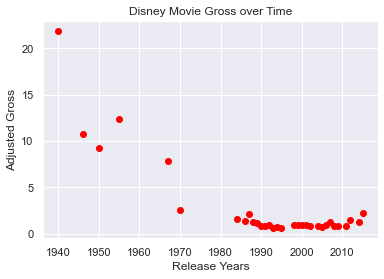

In [63]:
%matplotlib inline
plt.scatter(x_train,y_train,color='red')
plt.xlabel('Release Years')
plt.ylabel('Adjusted Gross')
plt.title('Disney Movie Gross over Time')
plt.show()

In [66]:
import seaborn as sns
sns.set()
plt.figure(figsize=(10,6), dpi = 300)

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

In [67]:
year_gross_df

,rel_years,gross
0,1937,52.289533
1,1940,21.876599
2,1946,10.785106
3,1950,9.206087
4,1955,12.360355
5,1961,7.438561
6,1962,1.095816
7,1967,7.896123
8,1970,2.551615
9,1984,1.570577


In [68]:
year_gross_df.head()

,rel_years,gross
0,1937,52.289533
1,1940,21.876599
2,1946,10.785106
3,1950,9.206087
4,1955,12.360355


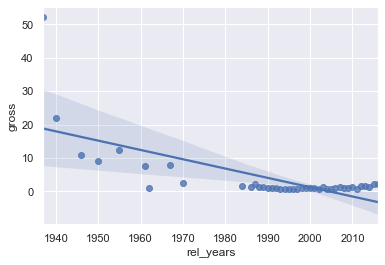

In [69]:
# df = dm.dropna()[['RYears','inflation_adjusted_gross']]
# df

sns.regplot(x = 'rel_years', y= 'gross', data = year_gross_df, order = 1)